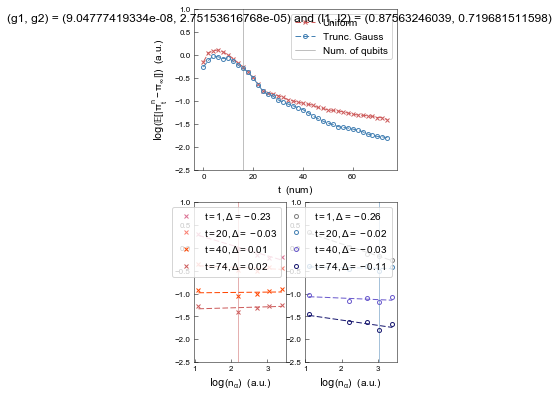

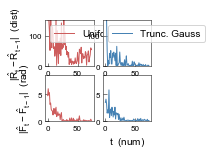

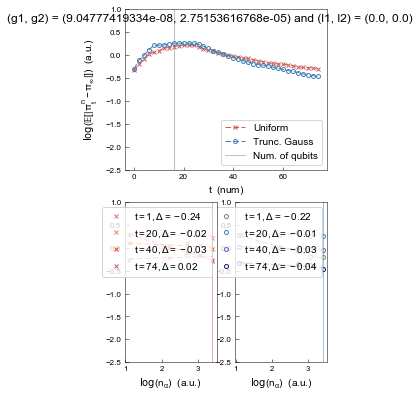

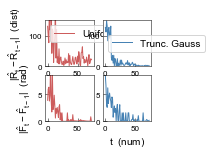

In [1]:
import numpy as np
import matplotlib
import sys
import os
sys.path.append('../qslam/')
from visualiserisk import *

###########################################################
# USER TO SPECIFY
###########################################################
# User to specify truth flag
idx_prefix = 0 #int(sys.argv[1])
path = './data_v3/'
prefix = '_idx_prefix_'+str(idx_prefix)+'_'

###########################################################
# DATA SOURCES AND SAVE PATHS
###########################################################
likelihoodparams_scan = np.load('./random_variances.npz')
lambda_pairs = np.load('./lambda_pairs_2.npz')
savetopath = './truth_flag_'+str(idx_prefix)+'/'


###########################################################
# SIMULATION SETTINGS (DO NOT CHANGE)
###########################################################
datatype=['Uni_R', 'Trunc_R']
keys =  ['marginalised_weights', 'predictive_weights', 'alpha_labels', 'beta_labels', 'rate_of_change_of_len', 'joint_labels', 'posterior_weights', 'joint_weights', 'leaf_weights']
particleconfigs = [ [3,2], [9,6], [15,10] , [21,14], [30, 20]]
paramlist =['optimal', 'zerolambda']

SIMULATIONSDICT = {}

for idx_truth_flag in range(5):
    
    SIMULATIONSDICT[idx_truth_flag] = {}
    
    SIMULATIONSDICT[idx_truth_flag]["num_of_nodes"] = 25
    SIMULATIONSDICT[idx_truth_flag]["linear"] = False
    SIMULATIONSDICT[idx_truth_flag]["repts"] = 50
    SIMULATIONSDICT[idx_truth_flag]["max_iterations"] = 75
    
    SIMULATIONSDICT[idx_truth_flag]["optimal"] = {}
    SIMULATIONSDICT[idx_truth_flag]["optimal"]["idx_1"] = None
    SIMULATIONSDICT[idx_truth_flag]["optimal"]["idx_2"] = None
    SIMULATIONSDICT[idx_truth_flag]["zerolambda"] = {}
    SIMULATIONSDICT[idx_truth_flag]["zerolambda"]["idx_1"] = None
    SIMULATIONSDICT[idx_truth_flag]["zerolambda"]["idx_2"] = 0 

    SIMULATIONSDICT[idx_truth_flag]["GRAPHMIN"] = -2.5 # Figure plotting
    SIMULATIONSDICT[idx_truth_flag]["GRAPHMAX"] = 1 # Figure plotting
    SIMULATIONSDICT[idx_truth_flag]["R_MAX"] = 150 # Figure plotting
    SIMULATIONSDICT[idx_truth_flag]["F_MAX"] = 8.5 # Figure plotting
    

# Specific settings
SIMULATIONSDICT[0]["linear"] = True
SIMULATIONSDICT[3]["num_of_nodes"] = 9
SIMULATIONSDICT[4]["num_of_nodes"] = 16

###########################################################
# NUMERICAL OPTIMISATION OUTPUTS
###########################################################

SIMULATIONSDICT[0]["optimal"]["idx_1"] = 5
SIMULATIONSDICT[0]["optimal"]["idx_2"] = 18 
SIMULATIONSDICT[0]["zerolambda"]["idx_1"] = 5
SIMULATIONSDICT[0]["zerolambda"]["idx_2"] = 0 

SIMULATIONSDICT[1]["optimal"]["idx_1"] = 16
SIMULATIONSDICT[1]["optimal"]["idx_2"] = 18 
SIMULATIONSDICT[1]["zerolambda"]["idx_1"] = 16
SIMULATIONSDICT[1]["zerolambda"]["idx_2"] = 0 

SIMULATIONSDICT[2]["optimal"]["idx_1"] = 29 # Min Trunc: 21
SIMULATIONSDICT[2]["optimal"]["idx_2"] = 13 # Min Trunc: 13
SIMULATIONSDICT[2]["zerolambda"]["idx_1"] = 29 # Min Trunc: 21
SIMULATIONSDICT[2]["zerolambda"]["idx_2"] = 0 

SIMULATIONSDICT[3]["optimal"]["idx_1"] = 4
SIMULATIONSDICT[3]["optimal"]["idx_2"] = 8
SIMULATIONSDICT[3]["zerolambda"]["idx_1"] = 4
SIMULATIONSDICT[3]["zerolambda"]["idx_2"] = 0 

SIMULATIONSDICT[4]["optimal"]["idx_1"] = 18 # Min Trunc: 18
SIMULATIONSDICT[4]["optimal"]["idx_2"] = 18 # Min Trunc: 12
SIMULATIONSDICT[4]["zerolambda"]["idx_1"] = 18 # Min Trunc: 18
SIMULATIONSDICT[4]["zerolambda"]["idx_2"] = 0 

###########################################################
# FIGURE GENERATION
###########################################################



for idx_figure in range(2):
    
    idx_paramtype = paramlist[idx_figure]
    idx_1 = SIMULATIONSDICT[idx_prefix][idx_paramtype]["idx_1"]
    idx_2 = SIMULATIONSDICT[idx_prefix][idx_paramtype]["idx_2"]
    max_iterations = SIMULATIONSDICT[idx_truth_flag]["max_iterations"]
    num_of_nodes = SIMULATIONSDICT[idx_truth_flag]["num_of_nodes"]
    
    GRAPHMIN = SIMULATIONSDICT[idx_truth_flag]["GRAPHMIN"]
    GRAPHMAX = SIMULATIONSDICT[idx_truth_flag]["GRAPHMAX"]
    R_MAX = SIMULATIONSDICT[idx_truth_flag]["R_MAX"]
    F_MAX = SIMULATIONSDICT[idx_truth_flag]["F_MAX"]

    #################################
    # DATA ANALYSIS
    #################################

    error_scaling_matrix_0 = 100.*np.ones((len(particleconfigs), max_iterations))
    error_scaling_matrix_1 = 100.*np.ones((len(particleconfigs), max_iterations))


    for idx_pconfig in range(len(particleconfigs)):

        test_data_0 = np.load(path+datatype[0]+prefix+'rand_'+str(idx_1)+'_'+str(idx_2)+'_'+str(idx_pconfig)+'.npz')
        error_scaling_matrix_0[idx_pconfig, :] = np.mean(np.mean(test_data_0['absolute_errors_matrix']**2, axis=0), axis=1)

        test_data_1 = np.load(path+datatype[1]+prefix+'rand_'+str(idx_1)+'_'+str(idx_2)+'_'+str(idx_pconfig)+'.npz')
        error_scaling_matrix_1[idx_pconfig, :] = np.mean(np.mean(test_data_1['absolute_errors_matrix']**2, axis=0), axis=1)

    particle_number = np.asarray([idp[0] for idp in particleconfigs] ) 
    idx_pconfig_T = np.argmin(error_scaling_matrix_1[:,74])
    idx_pconfig_U = np.argmin(error_scaling_matrix_0[:,74])

    #################################
    # FIGURE 1
    #################################

    colorsU = [ 'indianred', 'orangered', 'salmon', 'palevioletred' ]#, 'pink']
    colors = ['midnightblue', 'slateblue',   'steelblue', 'gray']#'lightsteelblue']
    colors=colors[::-1]
    colorsU=colorsU[::-1]
    times =[1, 20, 40 ,74]

    gslayout = gs(2,2, top = 0.99, bottom =0.1, left = 0.15, right = 0.98, wspace = 0.2, hspace = 0.2)

    fig = plt.figure(figsize=(cm2inch(8.6),cm2inch(14)))


    plt.suptitle('(g1, g2) = (%s, %s) and (l1, l2) = (%s, %s)' %(likelihoodparams_scan['g1var'][idx_1], 
                                                                 likelihoodparams_scan['g2var'][idx_1],
                                                                 lambda_pairs['lambda_1'][idx_2],
                                                                 lambda_pairs['lambda_2'][idx_2],

                                                                ),
                )

    ax_err = fig.add_subplot(gslayout[0, :])
    ax_scl = fig.add_subplot(gslayout[1, 1])
    ax_uni = fig.add_subplot(gslayout[1, 0])

    #################################
    # bottom
    #################################
    for idx_t in range(len(times)):

        slope, intercept = np.polyfit(np.log(particle_number), np.log(error_scaling_matrix_1[:, times[idx_t]]), 1)

        ax_scl.plot(np.log(particle_number), np.log( error_scaling_matrix_1[:, times[idx_t]]), 
                 'o', ms=4, markerfacecolor='None', lw=1., c= colors[idx_t], label= r'$t=%s, \Delta = %s$'%(times[idx_t], np.round(slope, 2)))

        trendpoly = np.poly1d([slope,intercept]) 

        ax_scl.plot(np.log(particle_number),trendpoly(np.log(particle_number)), '--',  lw=1., c= colors[idx_t])
        ax_scl.axvline(x=np.log(particleconfigs[idx_pconfig_T][0]), ls='-', lw=1., c='steelblue', alpha=0.15)

    ax_scl.set_xlabel(r'$\log(n_\alpha)$  (a.u.)')
    ax_scl.set_ylabel(r'$\log(\mathbb{E}[|\pi^n_t - \pi_\infty|])$  (a.u.)')
    ax_scl.set_ylim([GRAPHMIN, GRAPHMAX])
    ax_scl.legend(loc=1)



    for idx_t in range(len(times)):

        slope, intercept = np.polyfit(np.log(particle_number), np.log(error_scaling_matrix_0[:, times[idx_t]]), 1)

        ax_uni.plot(np.log(particle_number), np.log( error_scaling_matrix_0[:, times[idx_t]]), 
                 'x', lw=1., ms=4, c= colorsU[idx_t], label= r'$t=%s, \Delta = %s$'%(times[idx_t], np.round(slope, 2)))

        trendpoly = np.poly1d([slope,intercept]) 

        ax_uni.plot(np.log(particle_number),trendpoly(np.log(particle_number)), '--', lw=1.,  c= colorsU[idx_t])
        ax_uni.axvline(x=np.log(particleconfigs[idx_pconfig_U][0]), ls='-', lw=1., c='indianred', alpha=0.15)

    ax_uni.set_xlabel(r'$\log(n_\alpha)$  (a.u.)')
    #ax_uni.set_ylabel(r'$\log(\mathbb{E}[|\pi^n_t - \pi_\infty|])$  (a.u.)')
    ax_uni.set_ylim([GRAPHMIN, GRAPHMAX])
    ax_uni.legend(loc=1)

    #################################
    # top
    #################################

    ax_err.plot(range(75)[::2],np.log(error_scaling_matrix_0[idx_pconfig_U, ::2]), 'x--', 
                lw=1., ms=4, c='indianred', 
                label='Uniform')



    ax_err.plot(range(75)[::2],np.log(error_scaling_matrix_1[idx_pconfig_T, ::2]), 'o--', 
                lw=1., ms=4, 
                c='steelblue',
                markerfacecolor='None', label='Trunc. Gauss', alpha=1.)

    ax_err.set_xlabel(r'$t$  (num)')
    ax_err.set_ylabel(r'$\log(\mathbb{E}[|\pi^n_t - \pi_\infty|])$  (a.u.)')
    ax_err.set_ylim([GRAPHMIN, GRAPHMAX])
    ax_err.axvline(x=num_of_nodes, ls='-', color='grey', linewidth=0.5, label='Num. of qubits')
    ax_err.legend(loc=0)

    plt.savefig(savetopath+'fig_'+str(idx_paramtype)+'_error_'+str(idx_prefix)+'.svg', format='svg', dpi=800)
    plt.show()

    #################################
    # FIGURE 2
    #################################

    test_data_0 = np.load(path+datatype[0]+prefix+'rand_'+str(idx_1)+'_'+str(idx_2)+'_'+str(idx_pconfig_T)+'.npz')
    test_data_1 = np.load(path+datatype[1]+prefix+'rand_'+str(idx_1)+'_'+str(idx_2)+'_'+str(idx_pconfig_T)+'.npz')

    rate_of_change_of_map_0 = test_data_0['rate_of_change_of_map'][np.random.randint(low=0, high=50)]
    rate_of_change_of_len_0 = test_data_0['rate_of_change_of_len'][np.random.randint(low=0, high=50)]
    rate_of_change_of_map_1 = test_data_1['rate_of_change_of_map'][np.random.randint(low=0, high=50)]
    rate_of_change_of_len_1 = test_data_1['rate_of_change_of_len'][np.random.randint(low=0, high=50)]

    fig = plt.figure(figsize=(cm2inch(4.5),cm2inch(4)))
    gslayout = gs(2,2, top = 0.99, bottom =0.1, left = 0.15, right = 0.98, wspace = 0.2, hspace = 0.2)

    ax3 = fig.add_subplot(gslayout[1, 0])
    ax3.set_ylabel(r"$ | \hat{F}_t - \hat{F}_{t-1}|$  (rad)")
    ax3.plot(np.sum(rate_of_change_of_map_0, axis=1)[1:], c='indianred',lw=1)
    ax3.set_ylim([0., F_MAX])


    ax1 = fig.add_subplot(gslayout[0, 0])
    ax1.set_ylabel(r"$ | \hat{R}_t - \hat{R}_{t-1}|$  (dist)")
    ax1.plot(np.sum(rate_of_change_of_len_0, axis=1)[1:], c='indianred', lw=1, label='Uniform')
    ax1.set_ylim([0.00, R_MAX])
    ax1.legend(loc=0)
    #plt.yscale('log')


    ax4 = fig.add_subplot(gslayout[1,1])
    ax4.plot(np.sum(rate_of_change_of_map_1, axis=1)[1:], c='steelblue', lw=1)
    ax4.set_ylim([0., F_MAX])
    ax4.set_xlabel(r'$t$  (num)')

    ax2 = fig.add_subplot(gslayout[0,1])
    ax2.plot(np.sum(rate_of_change_of_len_1, axis=1)[1:], c='steelblue', lw=1, label='Trunc. Gauss')
    ax2.set_ylim([0.0, R_MAX])
    ax2.legend(loc=0)

    plt.savefig(savetopath+'fig_'+str(idx_paramtype)+'_error_state_change_'+str(idx_prefix)+'.svg', format='svg', dpi=800)
    plt.show()